In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt

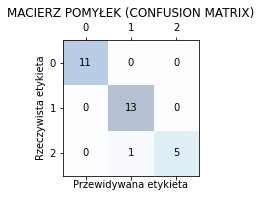

0.9666666666666667



In [2]:
iris = load_iris()
X = iris.data[:,2:] #długość i szerokość płaltka
y = iris.target

podzial = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)  #80% danych - zbiór treningowy, 20% danych - zbiór testowy
X_train, X_test, y_train, y_test = podzial

tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)
tree_clf.fit(X_train, y_train)

y_predicted = tree_clf.predict(X_test)

#macierz pomyłek
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

fig, ax = plt.subplots(figsize = (2.5, 2.5))
ax.matshow(confusion_matrix, cmap = plt.cm.Blues, alpha = 0.3)
    
for i in range (confusion_matrix.shape[0]):
    for j in range (confusion_matrix.shape[1]):
        ax.text(x = j, y = i, s = confusion_matrix[i, j], va = 'center', ha = 'center')
            
plt.xlabel('Przewidywana etykieta')
plt.ylabel('Rzeczywista etykieta')
plt.title("MACIERZ POMYŁEK (CONFUSION MATRIX)")
plt.show()

#skuteczność algorytmu
accuracy = metrics.accuracy_score(y_test, y_predicted)
print("Skuteczność = "accuracy)
print()

In [3]:
#wizualizacja drzewa
from sklearn.tree import export_graphviz
import graphviz

data = export_graphviz(
    tree_clf,
    out_file = None,
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

graph = graphviz.Source(data)

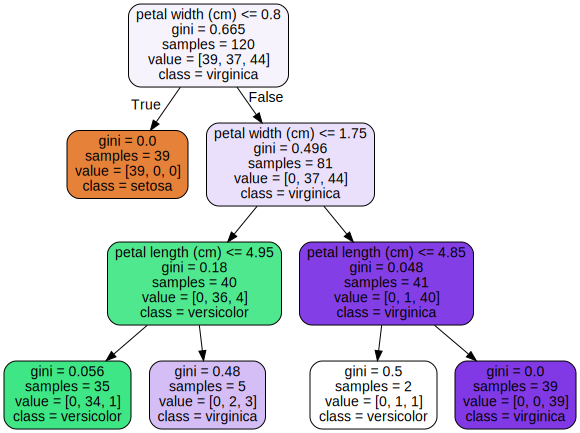

In [4]:
graph